<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_2_kNN_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com kNN
## ELE606 - Tópicos Especiais em Inteligência Artificial

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://miro.medium.com/v2/resize:fit:505/1*LeFn0JlmRaeVwC4eBZHZrg.png"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)



## Introdução

KNN significa K vizinhos mais próximos. O algoritmo KNN pode ser usado tanto para problemas de classificação quanto para problemas de regressão. O algoritmo KNN assume que categorias semelhantes estão próximas umas das outras.

Assim, quando uma entrada desconhecida é encontrada, as categorias de todas as entradas conhecidas nas suas proximidades são verificadas. A categoria/classe com maior contagem é definida como a classe para a entrada desconhecida.

O algoritmo primeiro calcula as distâncias entre o ponto desconhecido e todos os pontos do gráfico. Em seguida, ele pega os k pontos mais próximos. O valor de k pode ser determinado por nós. As categorias destes k pontos determinam, então, a categoria do nosso ponto desconhecido.

---

## Algoritmo e código

### Pré-processamento dos dados

Primeiramente, vamos importar os módulos utilizados.

In [ ]:
import pandas as pd   # Manipulação dos dados
import numpy as np    # Análises numéricas
import matplotlib.pyplot as plt   # Geração de gráficos
import seaborn as sns   # Visualização
from sklearn.datasets import load_wine    # Carregar dataset
from sklearn.preprocessing import StandardScaler  # Normalização
from sklearn.model_selection import train_test_split    # Seperar dados para treino e teste
from sklearn.neighbors import KNeighborsClassifier    # O modelo kNN
from sklearn.metrics import accuracy_score    # Ver acurácia
from sklearn.metrics import confusion_matrix    # Matriz de confusão

Vamos carregar a base de dados na configuração desejada (esse passo realizamos na atividade anterior).

In [ ]:
wine_data = load_wine()
wine_df = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])
wine_df['target'] = wine_data['target']

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


É sempre importante realizarmos algumas análise na estrutura de dados que nós temos.

In [ ]:
wine_df.info()    # Informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.describe()   # Descrição de colunas numéricas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


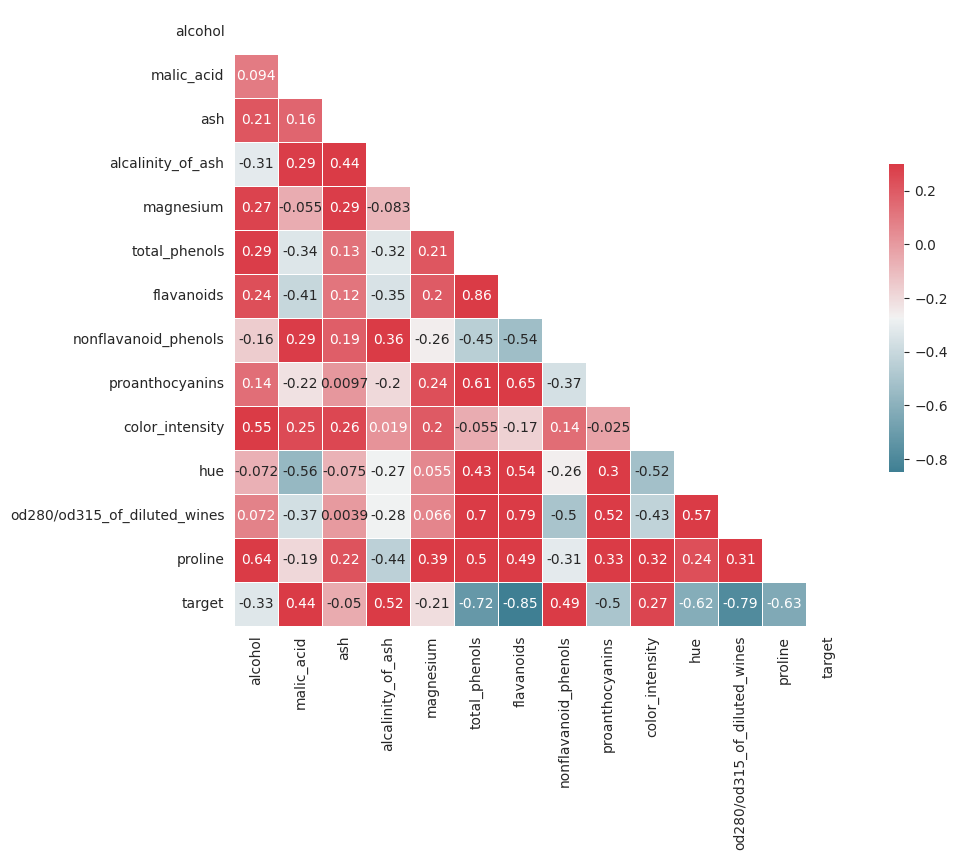

In [ ]:
# Ver mapa de calor mostrando a correlação entre as variáveis

corr = wine_df.corr()   # Retirar correlação

# Gerar máscara para o gráfico - será triangular
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Gerar um colormap diversificado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Gerar a figura com o matplotlib
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Vemos que a correlação de _ash_ com o _target_ é muito pequena, vamos retirar essa coluna da análise.

In [ ]:
wine_df.drop(['ash'], axis = 1, inplace = True)
wine_df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Para treinar o modelo, precisamos separar a coluna de labels (saídas esperadas) da dataframe com os features (entradas).

In [ ]:
result = wine_df['target']

wine_df.drop(['target'], axis=1, inplace=True)

result
print(wine_df.shape, result.shape)

(178, 12) (178,)


Agora, conforme solicitado e também feito na atividade anterior, vamos normalizar os dados fazendo escalonamento linear.

In [ ]:
# Função para normalizar uma coluna por escalonamento linear
def escalonamento_linear(column):
    return (column - column.min()) / (column.max() - column.min())

# Aplicar a função de normalização a todas as colunas do dataframe
normalized_wine_df = wine_df.apply(escalonamento_linear)

normalized_wine_df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
normalized_wine_df.describe()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Para finalizar o pré-processamento dos dados, é necessário separar os dados de teste e os dados de treinamento. Para fazer isso, 70% dos dados foram usados para o treino, equanto que os outros 30% foram utilizados para testar o modelo.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_wine_df, result, test_size=0.30, random_state=11)

### Treinamento do Modelo

Para treinar o modelo, vamos fazer uma função que recebe o número de vizinho e retorna as predições para os dados separados para teste. Mas antes de fazer a função, é necessário converter os dados em _numpy arrays_.

In [ ]:
# Conversão para numpy array
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
# Função descrita
def apply_knn(neigh, weight='uniform'):
    knn = KNeighborsClassifier(n_neighbors=neigh, weights=weight)
    knn.fit(X_train, Y_train)
    pred_knn = knn.predict(X_test)
    return pred_knn

Vamos ver a predição de acurácia para o caso específico de $k = 5$.

In [ ]:
k = 5
pred_knn = apply_knn(k)
print(f'A acurácia do modelo para K={k} é de {accuracy_score(Y_test, pred_knn):.4f}')

A acurácia do modelo para K=5 é de 0.9259


Foi um ótimo valor, significa que o modelo está funcionando corretamente.

### Análise dos Resultados

Tabela onde as linhas são o tamanho da base de conhecimento por classe e as
colunas são os valores de K. As células serão as médias da acurácia para 10 simulações, emcada caso.

In [ ]:
# Valores de k para coleta dos resultados
k_values = [1, 3, 5, 7, 9]

# Quantidades de execução para o cálculo da média
execution_counts = [10, 20, 30, 40, 50]

# Crie um DataFrame para armazenar as médias da acurácia
result_df = pd.DataFrame(columns=k_values, index=execution_counts)

# Loop para retornar em um dataframe
for exec_count in execution_counts:
    x_train, x_test, y_train, y_test = train_test_split(normalized_wine_df, result, train_size=0.0056*exec_count, random_state=11)
    # Conversão para numpy array
    y_train = y_train.to_numpy()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()
    row_index = execution_counts.index(exec_count)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        knn.fit(x_train, y_train)
        pred_knn = knn.predict(x_test)
        acc = accuracy_score(y_test, pred_knn)  # Calcula a acurácia
        result_df.at[exec_count, k] = acc

# Exiba o DataFrame final com os índices modificados
result_df.index.name = 'Número de Pacotes Utilizados no Treinamento'
result_df

,1,3,5,7,9
Número de Pacotes Utilizados no Treinamento,,,,,
10,0.733728,0.621302,0.384615,0.384615,0.384615
20,0.924528,0.962264,0.955975,0.886792,0.641509
30,0.946309,0.939597,0.973154,0.95302,0.879195
40,0.935252,0.94964,0.956835,0.971223,0.956835
50,0.953488,0.96124,0.968992,0.96124,0.968992


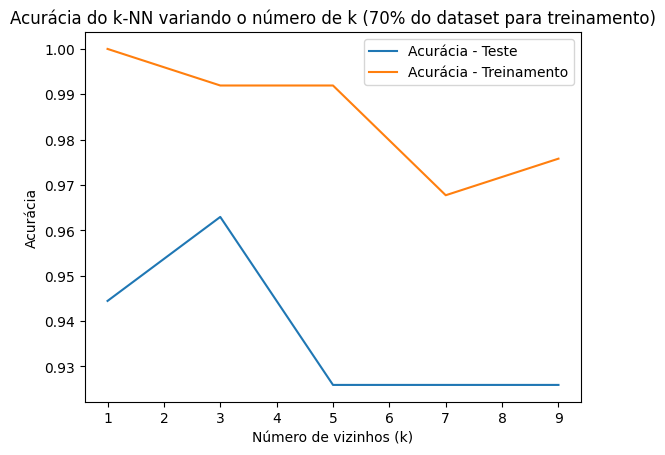

In [ ]:
# Listas para armazenar as acurácias de treinamento e teste
train_accuracies = []
test_accuracies = []

# Loop para cada valor de k
for k in k_values:
    pred_knn = apply_knn(k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    # Calcular as acurácias de treinamento e teste
    knn.fit(X_train, Y_train)
    train_accuracy = accuracy_score(Y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(Y_test, pred_knn)

    # Adicione as acurácias às listas
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Gerar o gráfico
plt.title('Acurácia do k-NN variando o número de k (70% do dataset para treinamento)')
plt.plot(k_values, test_accuracies, label='Acurácia - Teste')
plt.plot(k_values, train_accuracies, label='Acurácia - Treinamento')
plt.legend()
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Acurácia')
plt.show()

Vemos que, tanto a quantidade de pacotes de treinamento quanto a valor de _k_ influenciaram significativamente na acurácia.

- No gráfico: observa-se que, dentre os valores de k utilizados, o que obteve a acurácia mais alta foi $k=3$. Com valores de _k_ mais altos, houve uma menor acurácia devido a um possível overfitting. O modelo não generalizou bem para $k>3$. Já para $k=1$ houve uma melhor adequação que $k>3$, mais pior que para $k=3$ - isso pode mostrar um underfitting do modelo. Obs.: No gráfico, utilizou-se 70% dos dados para treinamento e 30% para os testes de acurácia.

- Na tabela: o valor de k não influenciou significativamente para muitos pacotes de treinamento, mas em geral, sua melhor acurácia foi entre _k=3_ e _k=5_.

Vamos, agora, gerar a matriz de confusão.

In [ ]:
print(pd.DataFrame(Y_test).value_counts())

1    22
0    21
2    11
dtype: int64


In [ ]:
cm = confusion_matrix(Y_test, apply_knn(3))   # cm armazenará a matriz

# Vamos formatar a matriz de confusão
tipos = ["Classe 0","Classe 1","Classe 2"]
print(pd.DataFrame(cm, index=tipos, columns=tipos))

          Classe 0  Classe 1  Classe 2
Classe 0        21         0         0
Classe 1         1        20         1
Classe 2         0         0        11


Vemos uma matriz 3x3, onde nas linhas temos as classificações pelo KNN e nas colunas as classes corretas. O ideal é que a matriz de confusão fosse completamente diagonal, então, temos uma matriz quase ideal.

Para finalizar, vamos refazer a tabela de Execuções vs K para os dados com uma normalização _z-score_.

In [ ]:
# Normalizar pelo Z_score
def z_score_normalize_column(column):
    mean = column.mean()
    std = column.std()

    normalized_column = (column - mean) / std

    return normalized_column

In [ ]:
normalized_wine_df = wine_df.apply(z_score_normalize_column)

# Valores de k para coleta dos resultados
k_values = [1, 3, 5, 7, 9]

# Quantidades de execução para o cálculo da média
execution_counts = [10, 20, 30, 40, 50]

# Crie um DataFrame para armazenar as médias da acurácia
result_df = pd.DataFrame(columns=k_values, index=execution_counts)

# Loop para retornar em um dataframe
for exec_count in execution_counts:
    x_train, x_test, y_train, y_test = train_test_split(normalized_wine_df, result, train_size=0.0056*exec_count, random_state=11)
    # Conversão para numpy array
    y_train = y_train.to_numpy()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()
    row_index = execution_counts.index(exec_count)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        knn.fit(x_train, y_train)
        pred_knn = knn.predict(x_test)
        acc = accuracy_score(y_test, pred_knn)  # Calcula a acurácia
        result_df.at[exec_count, k] = acc

# Exiba o DataFrame final com os índices modificados
result_df.index.name = 'Número de Pacotes Utilizados no Treinamento'
result_df

,1,3,5,7,9
Número de Pacotes Utilizados no Treinamento,,,,,
10,0.721893,0.621302,0.384615,0.384615,0.384615
20,0.930818,0.955975,0.955975,0.880503,0.672956
30,0.932886,0.939597,0.95302,0.946309,0.885906
40,0.942446,0.935252,0.94964,0.942446,0.935252
50,0.96124,0.968992,0.968992,0.945736,0.937984


Vemos um resultado melhor no geral para um valor de k menor. Porém, o máximo valor de acurácia permaneceu na mesma faixa, quando comparado ao outro tipo de normalização.